In [1]:
%load_ext autoreload
%autoreload 2

## This is a tutorial on `hist` mode scenario of `plot_image` function.

For valid parameters info address `MatplotlibPlotter.hist` documentation.

In [2]:
# Necessary imports
import sys
import numpy as np

sys.path.append('../..')
from seismiqb import plot_image

../../seismiqb/batchflow/batchflow/notifier.py:8: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm as tqdm_auto


In [3]:
# Sample data generation
shape = (50, 50)

image_0 = np.random.normal(loc=np.random.rand(), size=shape)
image_1 = np.random.normal(scale=np.random.rand(), size=shape)

This is the usual way to display several images.

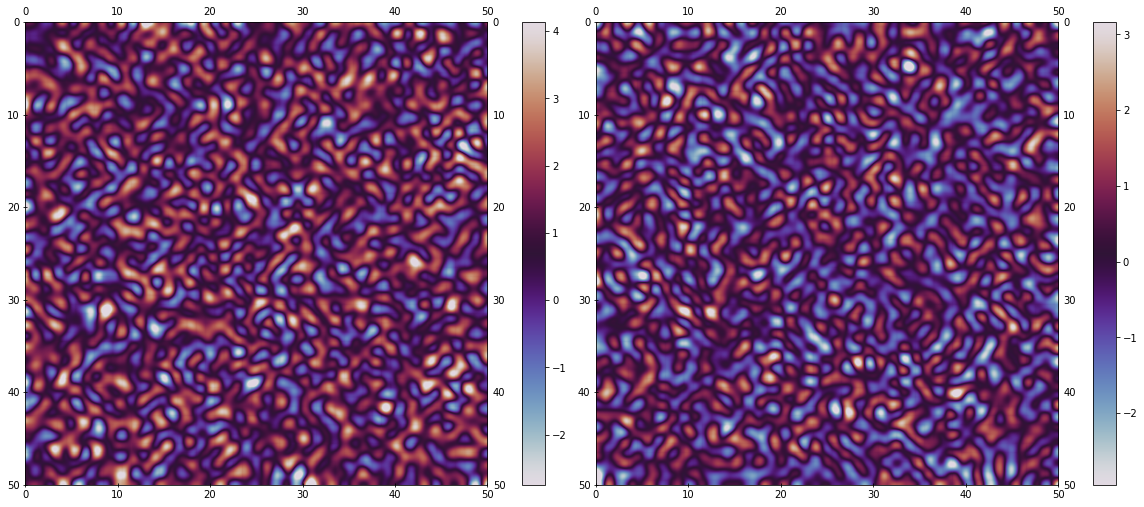

In [4]:
plot_image([image_0, image_1], figsize=(16,8), cmap='twilight', interpolation='sinc', colorbar=True, separate=True)

To make make histogram plot of them, simply specify the mode of the same name.

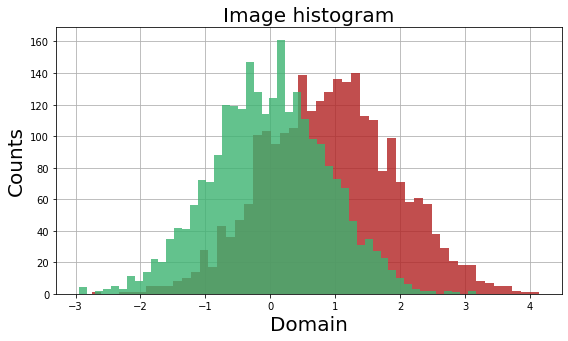

In [5]:
figure_params = {'mode' : 'hist'}

annotation_params = {
    'title_label' : 'Image histogram',
    'xlabel': 'Domain',
    'ylabel': 'Counts',
    'grid': True,
}

plot_image([image_0, image_1], **annotation_params, **figure_params)

When parameter name collision occurs, simply prefix it with specific method alias followed by underscore.

Example below show, how to specify that `label` argument is meant for legend (and not for title or tick labels).

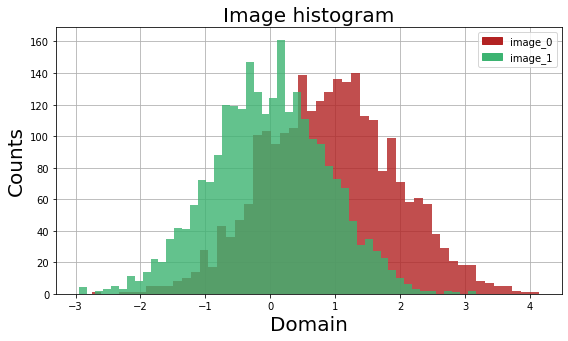

In [6]:
annotation_params['legend_label'] = ['image_0', 'image_1']

plot_image([image_0, image_1], **annotation_params, **figure_params)

There are a few default params, but to use more advanced prefix names to specify the method they are meant for.

Example below shows, how to specify that `orientation` argument is redirected to the list of parameters for `plt.hist` via prefix.

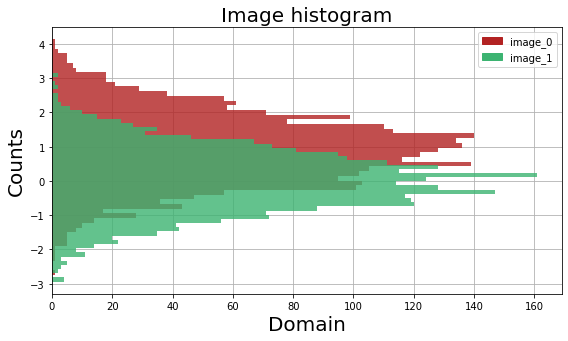

In [7]:
plot_image([image_0, image_1], hist_orientation='horizontal', **annotation_params, **figure_params, return_figure=False)

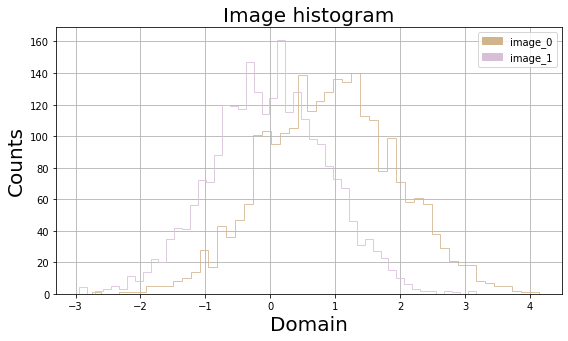

In [8]:
hist_params = {
    'color': ['tan', 'thistle'],
    'hist_histtype': 'step'
}

plot_image([image_0, image_1], **hist_params, **annotation_params, **figure_params)

To display histograms separately use `separate` bool flag.

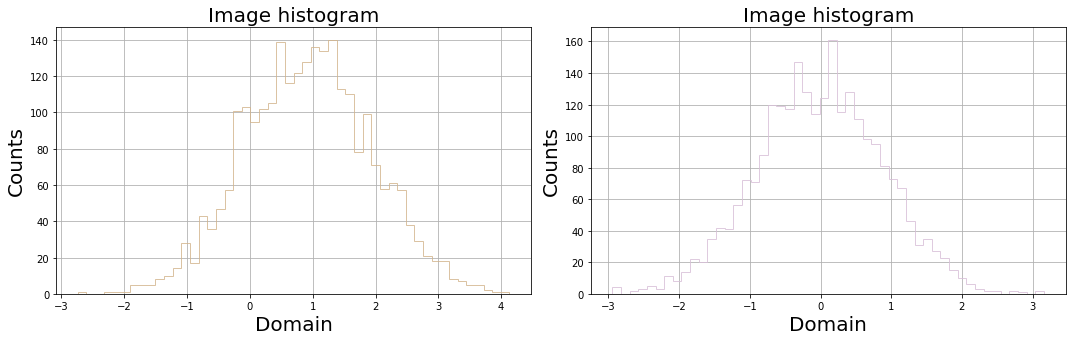

In [9]:
figure_params['figsize'] = (15, 5)

annotation_params['legend_label'] = None

plot_image([image_0, image_1], separate=True, **hist_params, **annotation_params, **figure_params)

To display histograms in 'mixed' manner, i.e. with some histograms overlaid and some displayed separately, use nested lists of histograms arrays.

If list has level 2 nestedness, outer level defines subplots order while inner one defines layers order.

Note, that parameters should have same nestedness level.

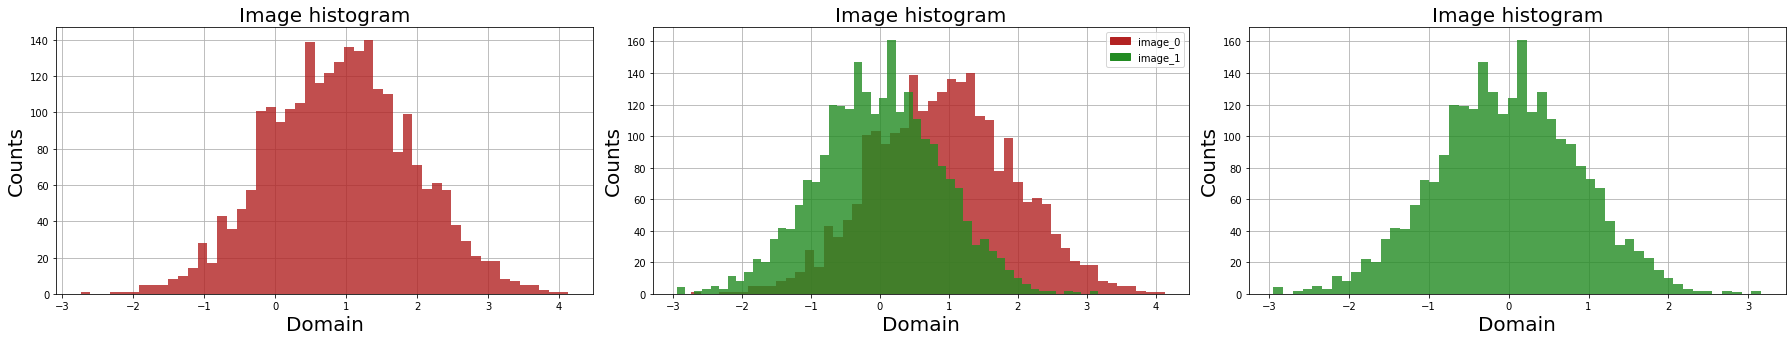

In [10]:
figure_params['figsize'] = (25, 5)
color_0, color_1 = 'firebrick', 'forestgreen'
hist_params['color'] = [[color_0], [color_0, color_1], [color_1]]
hist_params['hist_histtype'] = 'bar'

annotation_params['legend_label'] = [None, ['image_0', 'image_1'], None]

plot_image([image_0, [image_0, image_1], image_1], **hist_params, **annotation_params, **figure_params)

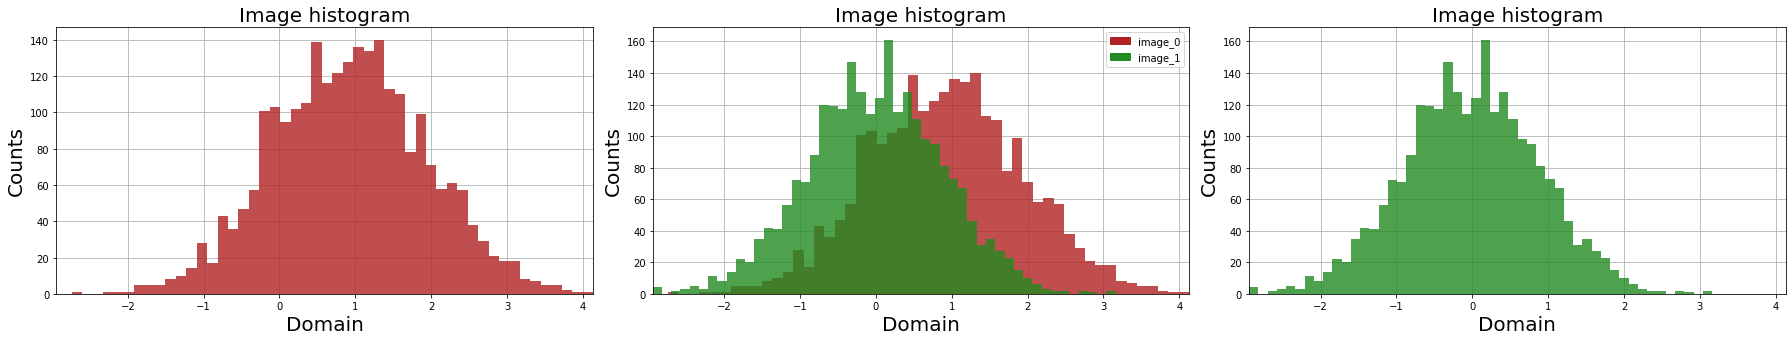

In [11]:
annotation_params['xlim'] = (min(image_0.min(), image_1.min()), max(image_0.max(), image_1.max()))

plot_image([image_0, [image_0, image_1], image_1], **hist_params, **annotation_params, **figure_params)

Using `return_figure` bool flag, one can obtain resulted figure and plot additional images on its axes.

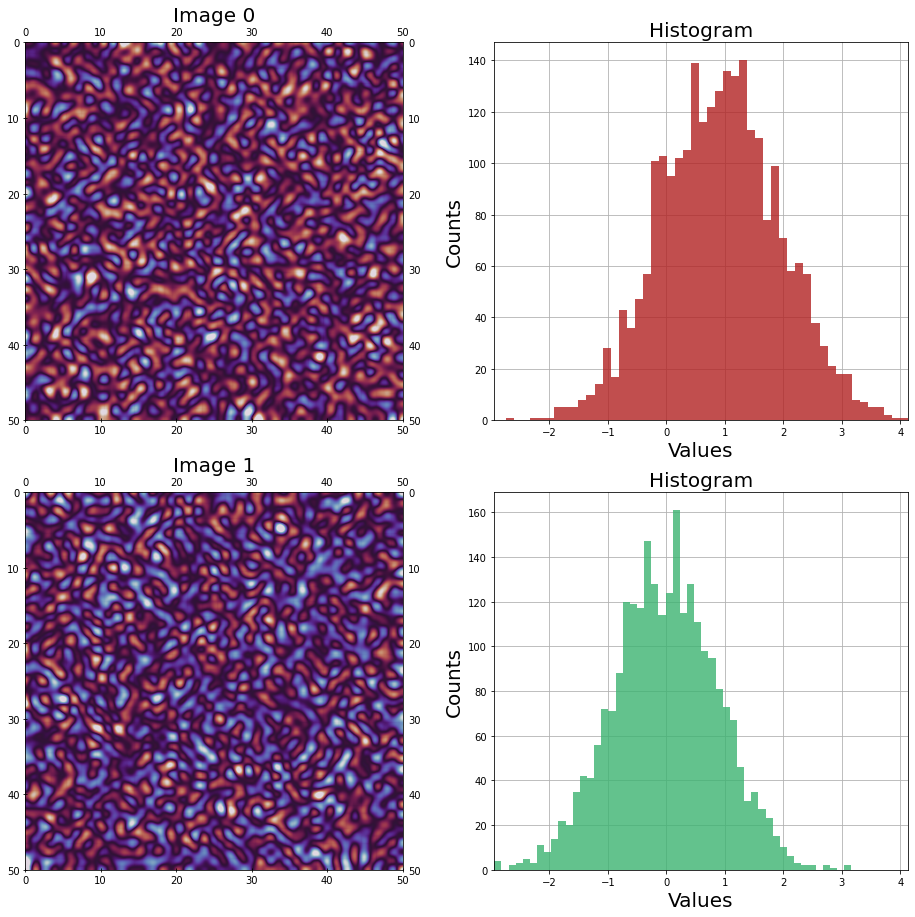

In [12]:
figure_params = {
    'figsize': (13, 13),
    'ncols': 2,
    'nrows': 2,
}

fig = plot_image(**figure_params, return_figure=True)


imshow_params = {
    'separate': True,
    'cmap': 'twilight',
    'interpolation': 'sinc',
    'title': ['Image 0', 'Image 1'],
    'axes': [fig.axes[0], fig.axes[2]]
}

plot_image([image_0, image_1], **imshow_params) 

hist_params = {
    'mode': 'hist',
    'separate': True,
    'axes': [fig.axes[1], fig.axes[3]],
    'title': 'Histogram',
    'xlim': annotation_params['xlim']
}

plot_image([image_0, image_1], **hist_params)